In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('STS-121AscentData.csv')
data

,Time,Altitude,Velocity,Acceleration
0,0,-8,0,2.45
1,20,1244,139,18.62
2,40,5377,298,16.37
3,60,11617,433,19.40
4,80,19872,685,24.50
5,100,31412,1026,24.01
6,120,44726,1279,8.72
7,140,57396,1373,9.70
8,160,67893,1490,10.19
9,180,77485,1634,10.68


In [56]:
def Plotpattern(xoriginal,yoriginal,xpoints,ypoints,xInterpolation,yInterpolation):
    fig = plt.figure(figsize = (10,8))
    plt.plot(xInterpolation, yInterpolation, 'b')
    plt.plot(xoriginal, yoriginal, 'ro')
    plt.plot(xpoints, ypoints, 'ms')
    plt.title('Data')
    plt.grid()
    plt.xlabel('Tempo (s)')
    plt.ylabel('Velocidade (m/s)')
    plt.show()


Index(['Time', 'Altitude', 'Velocity', 'Acceleration'], dtype='object')
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380 400 420 440 460 480 500 520]


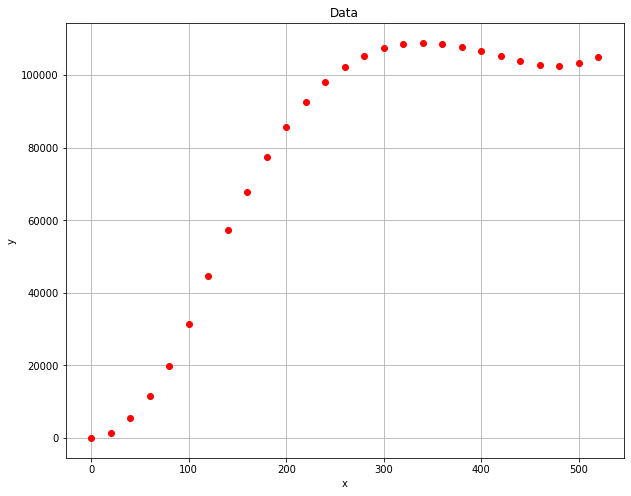

In [57]:
fig = plt.figure(figsize = (10,8))

print(data.columns)

y = data['Altitude'].to_list()
x = np.arange(0, 540, 20)
print(x)
plt.plot( x, y, 'ro')
plt.title('Data')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
def P(xt,x,i):
    result = []
    for j in range(len(x)):
        if(j != i):
            result.append((xt-x[j])/(x[i]-x[j]))
    return np.prod(result)
         

def Lagrange(x,y,xt):
    result = []
    for i in range(len(x)):
        result.append(y[i]*P(xt,x,i))
    return np.sum(result)

[  0  40  80 120 160 200 240 280 320 360 400 440 480 520]
[-8, 5377, 19872, 44726, 67893, 85662, 98004, 105321, 108619, 108543, 106539, 103775, 102552, 105069]


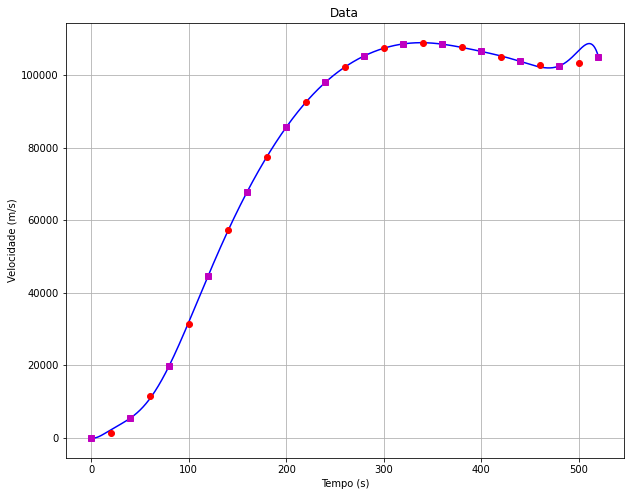

In [59]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]

print(xtarget)
print(ytarget)

xLagrange = np.arange(0.0, 520.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i)for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)

In [60]:
def getNearPoints(n, x ,y, xTarget):
    xpLeft = []
    ypLeft = []
    xpRight = []
    ypRight = []
    nLeft = 0
    nRight = 0
    for i in range(len(x)):
        if x[i] < xTarget:
            if nLeft < n:
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1
            else:
                xpLeft.pop(0)
                ypLeft.pop(0)
                xpLeft.append(x[i])
                ypLeft.append(y[i])
                nLeft += 1

        if x[i] > xTarget:
            if nRight < n:
                xpRight.append(x[i])
                ypRight.append(y[i])
                nRight += 1
            else:
                break
        
        xp = xpLeft + xpRight
        yp = ypLeft + ypRight
        
    return xp, yp
    

[  0  40  80 120 160 200 240 280 320 360 400 440 480 520]
[-8, 5377, 19872, 44726, 67893, 85662, 98004, 105321, 108619, 108543, 106539, 103775, 102552, 105069]


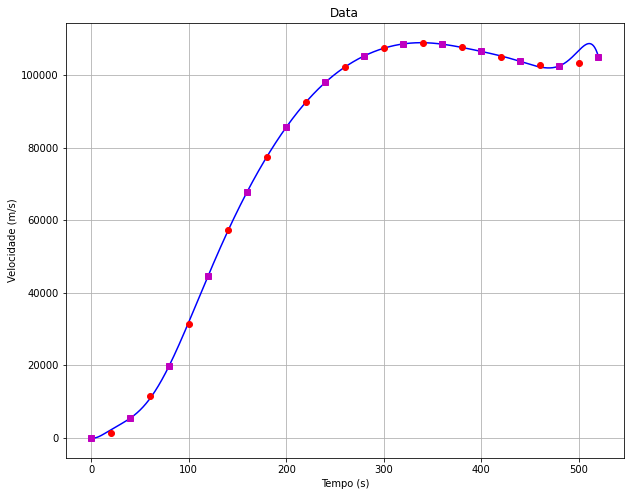

In [61]:
xtarget = np.arange(0, 560, 40)
ytarget = [y[i*2] for i in range(len(xtarget))]

print(xtarget)
print(ytarget)

xLagrange = np.arange(0.0, 520.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i)for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)

In [62]:
xtest , ytest = getNearPoints(4,x,y,280)
print(xtest)
print(ytest)
data

[200, 220, 240, 260, 300, 320, 340, 360]
[85662, 92481, 98004, 102301, 107449, 108619, 108942, 108543]


,Time,Altitude,Velocity,Acceleration
0,0,-8,0,2.45
1,20,1244,139,18.62
2,40,5377,298,16.37
3,60,11617,433,19.40
4,80,19872,685,24.50
5,100,31412,1026,24.01
6,120,44726,1279,8.72
7,140,57396,1373,9.70
8,160,67893,1490,10.19
9,180,77485,1634,10.68


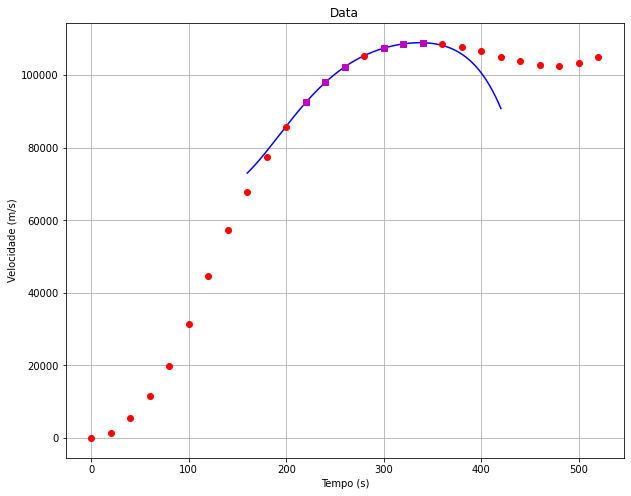

In [72]:
xtarget ,ytarget = getNearPoints(3,x,y,280)

xLagrange = np.arange(160, 420.1, 0.1)
yLagrange = [Lagrange(xtarget,ytarget,i) for i in xLagrange]

Plotpattern(x,y,xtarget,ytarget,xLagrange,yLagrange)